In [46]:
import os
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [2]:
print(os.system("cmd"))

0


In [69]:
df = pd.read_csv('Datasets\\mondial\\target.csv')
df_population = pd.read_csv('Datasets\\mondial\\population.csv')
df_encompasses = pd.read_csv('Datasets\\mondial\\encompasses.csv')
df_economy = pd.read_csv('Datasets\\mondial\\economy.csv')
df_language = pd.read_csv('Datasets\\mondial\\language.csv')

In [4]:
print("mondial_original_target")
print(df["Target"].value_counts(normalize=True))

mondial_original_target
Christian        0.637255
non-Christian    0.362745
Name: Target, dtype: float64


In [109]:
exp = "mondial_target_infant_mortality_g40"
df_population = pd.read_csv('Datasets\\mondial\\population.csv')
print(exp)
print((df_population["Infant_Mortality"]>40).value_counts(normalize=True))
print(f"columns={list(df_population.columns)}")
mondial_target_infant_mortality_g40=df_population.copy()[["Country", "Infant_Mortality"]]
mondial_target_infant_mortality_g40["Infant_Mortality"]=(mondial_target_infant_mortality_g40["Infant_Mortality"]>40)
mondial_target_infant_mortality_g40.rename(columns={"Infant_Mortality":"Target"},inplace=True)
#mondial_target_infant_mortality_g40.to_csv(f'Datasets\\{exp}\\target.csv', index=False)  

mondial_target_infant_mortality_g40
False    0.605042
True     0.394958
Name: Infant_Mortality, dtype: float64
columns=['Country', 'Population_Growth', 'Infant_Mortality']


In [116]:
exp = "mondial_target_population_growth"
df_population = pd.read_csv('Datasets\\mondial\\population.csv')
print(exp)
print(df_population["Population_Growth"].describe())
print((df_population["Population_Growth"]>1.75).value_counts(normalize=True))
print(f"columns={list(df_population.columns)}")
mondial_target_Population_Growth=df_population.copy()[["Country", "Population_Growth"]]
mondial_target_Population_Growth["Population_Growth"]=(mondial_target_Population_Growth["Population_Growth"]>1.75)
mondial_target_Population_Growth.rename(columns={"Population_Growth":"Target"},inplace=True)
mondial_target_Population_Growth.to_csv(f'Datasets\\{exp}\\target.csv', index=False)  

mondial_target_population_growth
count    238.000000
mean       1.563937
std        1.656585
min       -3.300000
25%        0.552500
50%        1.540000
75%        2.365000
max       16.490000
Name: Population_Growth, dtype: float64
False    0.567227
True     0.432773
Name: Population_Growth, dtype: float64
columns=['Country', 'Population_Growth', 'Infant_Mortality']


In [70]:
exp = "mondial_target_continent"
print(exp)
print((df_encompasses["Continent"]).value_counts(normalize=True))
print(f"columns={list(df_encompasses.columns)}")
mondial_target_continent=df_encompasses.copy()[["Country", "Continent"]]
mondial_target_continent.rename(columns={"Continent":"Target"},inplace=True)
mondial_target_continent.to_csv(f'Datasets\\{exp}\\target.csv', index=False)  

mondial_target_continent
Africa               0.227273
Europe               0.219008
Asia                 0.219008
America              0.214876
Australia/Oceania    0.119835
Name: Continent, dtype: float64
columns=['Country', 'Continent', 'Percentage']


In [73]:
exp = "mondial_target_GDP_g8e3"
print(exp)
print(df_economy[['Country', 'GDP']])
# print((df_economy["GDP"]).describe())
print((df_economy["GDP"]>8e3).value_counts(normalize=True))
print(f"columns={list(df_economy.columns)}")
mondial_target_GDP_g8e3=df_economy.copy()[["Country", "GDP"]]
mondial_target_GDP_g8e3["GDP"]=(mondial_target_GDP_g8e3["GDP"]>8e3)
mondial_target_GDP_g8e3.rename(columns={"GDP":"Target"},inplace=True)
mondial_target_GDP_g8e3.to_csv(f'Datasets\\{exp}\\target.csv', index=False)  

mondial_target_GDP_g8e3
    Country       GDP
0         A  152000.0
1       AFG   12800.0
2        AG     425.0
3        AL    4100.0
4      AMSA     462.2
..      ...       ...
233      YE   37100.0
234      YV  195500.0
235       Z    8900.0
236     ZRE   16500.0
237      ZW   18100.0

[238 rows x 2 columns]
True     0.5
False    0.5
Name: GDP, dtype: float64
columns=['Country', 'GDP', 'Agriculture', 'Service', 'Industry', 'Inflation']


In [108]:
exp = "genes"
df_classification = pd.read_csv('Datasets\\genes\\classification.csv')
print(len(df_classification))
print(exp)
# print((df_classification["Localization"]).describe())
# print((df_classification["Localization"]).value_counts()/len(df_classification["Localization"]))
print(f"columns={list(df_classification.columns)}")
df_genes = pd.read_csv('Datasets\\genes\\genes.csv')
print(len(df_genes))
print(f"columns={list(df_genes.columns)}")
df_joined = df_classification.merge(df_genes, on='GeneID', suffixes=('','_other'), how='left')
df_joined = df_joined[['GeneID', 'Essential']].drop_duplicates()
df_joined = df_classification.merge(df_joined, on='GeneID', suffixes=('','_other'), how='left')
df_joined = df_joined[['GeneID', 'Essential']]
df_joined = df_joined.loc[df_joined['Essential'].isin(['Non-Essential', 'Essential'])]
print(df_joined)
print((df_joined['Essential']).value_counts()/len(df_joined['Essential']))
df_joined.to_csv(f'Datasets\\genes_essential\\classification.csv', index=False)  

860
genes
columns=['GeneID', 'Localization']
4343
columns=['GeneID', 'Essential', 'Class', 'Complex', 'Phenotype', 'Motif', 'Chromosome', 'Function', 'Localization']
      GeneID      Essential
0    G234064      Essential
1    G234065  Non-Essential
2    G234070  Non-Essential
3    G234073  Non-Essential
4    G234074      Essential
..       ...            ...
855  G240410  Non-Essential
856  G240468  Non-Essential
857  G240490  Non-Essential
858  G240494  Non-Essential
859  G240504  Non-Essential

[812 rows x 2 columns]
Non-Essential    0.647783
Essential        0.352217
Name: Essential, dtype: float64


In [18]:
exp = "mutagenesis"
df_genes = pd.read_csv(f'Datasets\\{exp}\\molecule.csv')
print(exp)
print((df_genes["mutagenic"]).describe())
print((df_genes["mutagenic"]).value_counts()/len(df_genes["mutagenic"]))
# print((df_economy["Inflation"]>6).value_counts(normalize=True))
print(f"columns={list(df_genes.columns)}")

mutagenesis
count     188
unique      2
top       yes
freq      125
Name: mutagenic, dtype: object
yes    0.664894
no     0.335106
Name: mutagenic, dtype: float64
columns=['molecule_id', 'ind1', 'inda', 'logp', 'lumo', 'mutagenic']


In [22]:
exp = "world"
df_genes = pd.read_csv(f'Datasets\\{exp}\\country.csv')
print(exp)
print((df_genes["Continent"]).describe())
print((df_genes["Continent"]).value_counts()/len(df_genes["Continent"]))
# print((df_economy["Inflation"]>6).value_counts(normalize=True))
print(f"columns={list(df_genes.columns)}")

world
count        239
unique         7
top       Africa
freq          58
Name: Continent, dtype: object
Africa           0.242678
Asia             0.213389
Europe           0.192469
North America    0.154812
Oceania          0.117155
South America    0.058577
Antarctica       0.020921
Name: Continent, dtype: float64
columns=['Code', 'Name', 'Continent', 'Region', 'SurfaceArea', 'IndepYear', 'Population', 'LifeExpectancy', 'GNP', 'GNPOld', 'LocalName', 'GovernmentForm', 'HeadOfState', 'Capital', 'Code2']


In [66]:
exp = "hepatitis"
df_hepatitis = pd.read_csv('Datasets\\hepatitis\\dispat.csv')
print(exp)
print((df_hepatitis["type"]).describe())
print((df_hepatitis["type"]).value_counts()/len(df_hepatitis["type"]))
print(f"columns={list(df_hepatitis.columns)}")

hepatitis
count    500.000000
mean       0.588000
std        0.492688
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: type, dtype: float64
1    0.588
0    0.412
Name: type, dtype: float64
columns=['m_id', 'sex', 'age', 'type']


In [8]:
exp = "mondial_target_Inflation_g6"
print(exp)
# print((df_economy["Inflation"]).describe())
print((df_economy["Inflation"]>6).value_counts(normalize=True))
print(f"columns={list(df_economy.columns)}")
mondial_target_Inflation_g6=df_economy.copy()[["Country", "Inflation"]]
mondial_target_Inflation_g6["Inflation"]=(mondial_target_Inflation_g6["Inflation"]>6)
mondial_target_Inflation_g6.rename(columns={"Inflation":"Target"},inplace=True)
mondial_target_Inflation_g6.to_csv(f'Datasets\\{exp}\\target.csv', index=False) 

mondial_target_Inflation_g6
False    0.508403
True     0.491597
Name: Inflation, dtype: float64
columns=['Country', 'GDP', 'Agriculture', 'Service', 'Industry', 'Inflation']


In [9]:
# didn't do tests because 81% of languages are not "from Latin"
exp = "mondial_target_latin_language"
print(exp)
# print((df_language["Name"]).describe())
latin_languages = ["Italian","French","Portuguese","Spanish","Romanian","Catalan","Valenciá","Occitan","Galician","Sardo",
                   "Sicilian","Furlan","Romansch","Ladino","Judeo-Spanish","Ladin"]
print((df_language["Name"]).value_counts(normalize=True))
print(f"columns={list(df_language.columns)}")
mondial_target_latin_language=df_language.copy()[["Country", "Name"]]
mondial_target_latin_language["Name"]=mondial_target_latin_language["Name"].apply(lambda x: x in latin_languages)
print((mondial_target_latin_language["Name"]).value_counts(normalize=True))
mondial_target_latin_language.rename(columns={"Inflation":"Target"},inplace=True)
# mondial_target_latin_language.to_csv(f'Datasets\\{exp}\\target.csv', index=False) 
mondial_target_latin_language

mondial_target_latin_language
English        0.145833
French         0.069444
Spanish        0.055556
Russian        0.041667
German         0.034722
                 ...   
Luri           0.006944
Macedonian     0.006944
Montenegrin    0.006944
Nepali         0.006944
Wallisian      0.006944
Name: Name, Length: 74, dtype: float64
columns=['Country', 'Name', 'Percentage']
False    0.8125
True     0.1875
Name: Name, dtype: float64


,Country,Name
0,AFG,False
1,NAM,False
2,MK,False
3,MNE,False
4,IR,False
...,...,...
139,TM,False
140,PK,False
141,TM,False
142,UZB,False


In [49]:
# colors url: https://stackabuse.com/how-to-print-colored-text-in-python/
all_schemes = ['Country@target-Code@country>country>Name@country', 'Country@target-Code@country>country>Capital@country', 'Country@target-Code@country>country>Province@country', 'Country@target-Code@country>country>Area@country', 'Country@target-Code@country>country>Population@country', 'Country@target-Code@country>Code@country-Country1@borders>borders>Length@borders', 'Country@target-Code@country>Code@country-Country1@borders>Country2@borders-Code@country>country>Name@country', 'Country@target-Code@country>Code@country-Country1@borders>Country2@borders-Code@country>country>Capital@country', 'Country@target-Code@country>Code@country-Country1@borders>Country2@borders-Code@country>country>Province@country', 'Country@target-Code@country>Code@country-Country1@borders>Country2@borders-Code@country>country>Area@country', 'Country@target-Code@country>Code@country-Country1@borders>Country2@borders-Code@country>country>Population@country', 'Country@target-Code@country>Code@country-Country2@borders>borders>Length@borders', 'Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country>Name@country', 'Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country>Capital@country', 'Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country>Province@country', 'Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country>Area@country', 'Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country>Population@country', 'Country@target-Code@country>Code@country-Country@economy>economy>GDP@economy', 'Country@target-Code@country>Code@country-Country@economy>economy>Agriculture@economy', 'Country@target-Code@country>Code@country-Country@economy>economy>Service@economy', 'Country@target-Code@country>Code@country-Country@economy>economy>Industry@economy', 'Country@target-Code@country>Code@country-Country@economy>economy>Inflation@economy', 'Country@target-Code@country>Code@country-Country@encompasses>encompasses>Percentage@encompasses', 'Country@target-Code@country>Code@country-Country@encompasses>Continent@encompasses-Name@continent>continent>Area@continent', 'Country@target-Code@country>Code@country-Country@ethnicgroup>ethnicgroup>Name@ethnicgroup', 'Country@target-Code@country>Code@country-Country@ethnicgroup>ethnicgroup>Percentage@ethnicgroup', 'Country@target-Code@country>Code@country-Country@ismember>ismember>Type@ismember', 'Country@target-Code@country>Code@country-Country@ismember>Organization@ismember-Abbreviation@organization>organization>Name@organization', 'Country@target-Code@country>Code@country-Country@ismember>Organization@ismember-Abbreviation@organization>organization>Established@organization', 'Country@target-Code@country>Code@country-Country@language>language>Name@language', 'Country@target-Code@country>Code@country-Country@language>language>Percentage@language', 'Country@target-Code@country>Code@country-Country@politics>politics>Independence@politics', 'Country@target-Code@country>Code@country-Country@politics>politics>Government@politics', 'Country@target-Code@country>Code@country-Country@politics>Dependent@politics-Code@country>country>Name@country', 'Country@target-Code@country>Code@country-Country@politics>Dependent@politics-Code@country>country>Capital@country', 'Country@target-Code@country>Code@country-Country@politics>Dependent@politics-Code@country>country>Province@country', 'Country@target-Code@country>Code@country-Country@politics>Dependent@politics-Code@country>country>Area@country', 'Country@target-Code@country>Code@country-Country@politics>Dependent@politics-Code@country>country>Population@country', 'Country@target-Code@country>Code@country-Dependent@politics>politics>Independence@politics', 'Country@target-Code@country>Code@country-Dependent@politics>politics>Government@politics', 'Country@target-Code@country>Code@country-Dependent@politics>Country@politics-Code@country>country>Name@country', 'Country@target-Code@country>Code@country-Dependent@politics>Country@politics-Code@country>country>Capital@country', 'Country@target-Code@country>Code@country-Dependent@politics>Country@politics-Code@country>country>Province@country', 'Country@target-Code@country>Code@country-Dependent@politics>Country@politics-Code@country>country>Area@country', 'Country@target-Code@country>Code@country-Dependent@politics>Country@politics-Code@country>country>Population@country', 'Country@target-Code@country>Code@country-Country@population>population>Population_Growth@population', 'Country@target-Code@country>Code@country-Country@population>population>Infant_Mortality@population', 'Country@target-Code@country>Code@country-Country@province>province>Population@province', 'Country@target-Code@country>Code@country-Country@province>province>Area@province', 'Country@target-Code@country>Code@country-Country@province>province>Capital@province', 'Country@target-Code@country>Code@country-Country@province>province>CapProv@province', 'Country@target-Code@country>Code@country-Country@province>Country@province-Country@city>city>Population@city', 'Country@target-Code@country>Code@country-Country@province>Country@province-Country@city>city>Longitude@city', 'Country@target-Code@country>Code@country-Country@province>Country@province-Country@city>city>Latitude@city', 'Country@target-Code@country>Code@country-Country@province>Name@province-Province@city>city>Population@city', 'Country@target-Code@country>Code@country-Country@province>Name@province-Province@city>city>Longitude@city', 'Country@target-Code@country>Code@country-Country@province>Name@province-Province@city>city>Latitude@city', 'Country@target-Code@country>Code@country-Country@province>Country@province-Country@organization>organization>Name@organization', 'Country@target-Code@country>Code@country-Country@province>Country@province-Country@organization>organization>Established@organization', 'Country@target-Code@country>Code@country-Country@province>Name@province-Province@organization>organization>Name@organization', 'Country@target-Code@country>Code@country-Country@province>Name@province-Province@organization>organization>Established@organization', 'Country@target-Code@country>Code@country-Country@religion>religion>Name@religion', 'Country@target-Code@country>Code@country-Country@religion>religion>Percentage@religion']
r6_schemes = ['Country@target-Code@country>country>Capital@country', 'Country@target-Code@country>Code@country-Country1@borders>Country2@borders-Code@country>country>Capital@country', 'Country@target-Code@country>Code@country-Dependent@politics>Country@politics-Code@country>country>Name@country', 'Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country>Name@country', 'Country@target-Code@country>Code@country-Dependent@politics>politics>Independence@politics', 'Country@target-Code@country>Code@country-Country@province>Country@province-Country@city>city>Latitude@city', 'Country@target-Code@country>Code@country-Country@politics>Dependent@politics-Code@country>country>Area@country', 'Country@target-Code@country>Code@country-Country@religion>religion>Name@religion', 'Country@target-Code@country>Code@country-Country@ethnicgroup>ethnicgroup>Percentage@ethnicgroup', 'Country@target-Code@country>Code@country-Country1@borders>borders>Length@borders', 'Country@target-Code@country>Code@country-Country@encompasses>Continent@encompasses-Name@continent>continent>Area@continent', 'Country@target-Code@country>Code@country-Country@province>Name@province-Province@city>city>Longitude@city', 'Country@target-Code@country>country>Province@country', 'Country@target-Code@country>Code@country-Country@province>Country@province-Country@organization>organization>Established@organization', 'Country@target-Code@country>Code@country-Country@religion>religion>Percentage@religion', 'Country@target-Code@country>Code@country-Country@province>Name@province-Province@organization>organization>Name@organization', 'Country@target-Code@country>Code@country-Country2@borders>borders>Length@borders', 'Country@target-Code@country>Code@country-Country@population>population>Population_Growth@population', 'Country@target-Code@country>Code@country-Country@province>Country@province-Country@city>city>Population@city', 'Country@target-Code@country>Code@country-Country@language>language>Percentage@language', 'Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country>Capital@country', 'Country@target-Code@country>country>Area@country', 'Country@target-Code@country>Code@country-Country@province>province>Area@province', 'Country@target-Code@country>Code@country-Country@politics>Dependent@politics-Code@country>country>Capital@country', 'Country@target-Code@country>Code@country-Country@ismember>Organization@ismember-Abbreviation@organization>organization>Name@organization', 'Country@target-Code@country>Code@country-Country1@borders>Country2@borders-Code@country>country>Name@country', 'Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country>Population@country', 'Country@target-Code@country>country>Population@country', 'Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country>Province@country', 'Country@target-Code@country>Code@country-Country@politics>Dependent@politics-Code@country>country>Province@country']
for scheme in sorted(all_schemes):
    if scheme in r6_schemes:
        print(f'\033[1;32;47m{scheme}')
    else:
        print(f'\033[1;31;47m{scheme}')
    # print(f'\033[1;35;47m{scheme}') #purpule
    
# heuristic to remove on of:
#    Country1@borders>Country2@borders
#    Country2@borders>Country1@borders
remove_from_r6_to_reduse = ["Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country>Capital@country",
"Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country>Name@country",
"Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country>Population@country",
"Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country>Province@country",\
# no semantic meaning to Latitude (yuval) - DAMAGES
"Country@target-Code@country>Code@country-Country@province>Country@province-Country@city>city>Latitude@city"]
#from tests
"Country@target-Code@country>Code@country-Country@religion>religion>Percentage@religion"



Country@target-Code@country>Code@country-Country1@borders>Country2@borders-Code@country>country>Area@country
Country@target-Code@country>Code@country-Country1@borders>Country2@borders-Code@country>country>Capital@country
Country@target-Code@country>Code@country-Country1@borders>Country2@borders-Code@country>country>Name@country
Country@target-Code@country>Code@country-Country1@borders>Country2@borders-Code@country>country>Population@country
Country@target-Code@country>Code@country-Country1@borders>Country2@borders-Code@country>country>Province@country
Country@target-Code@country>Code@country-Country1@borders>borders>Length@borders
Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country>Area@country
Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country>Capital@country
Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country>Name@country
Country@target-Code@country>Cod

'Country@target-Code@country>Code@country-Country@religion>religion>Percentage@religion'

In [31]:
# bad subset of schemes compared to r6 on mondial original target (Christian-Not Cristian)
all_schemes = ['Country@target-Code@country>country>Name@country', 'Country@target-Code@country>country>Capital@country', 'Country@target-Code@country>country>Province@country', 'Country@target-Code@country>country>Area@country', 'Country@target-Code@country>country>Population@country', 'Country@target-Code@country>Code@country-Country1@borders>borders>Length@borders', 'Country@target-Code@country>Code@country-Country1@borders>Country2@borders-Code@country>country>Name@country', 'Country@target-Code@country>Code@country-Country1@borders>Country2@borders-Code@country>country>Capital@country', 'Country@target-Code@country>Code@country-Country1@borders>Country2@borders-Code@country>country>Province@country', 'Country@target-Code@country>Code@country-Country1@borders>Country2@borders-Code@country>country>Area@country', 'Country@target-Code@country>Code@country-Country1@borders>Country2@borders-Code@country>country>Population@country', 'Country@target-Code@country>Code@country-Country2@borders>borders>Length@borders', 'Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country>Name@country', 'Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country>Capital@country', 'Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country>Province@country', 'Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country>Area@country', 'Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country>Population@country', 'Country@target-Code@country>Code@country-Country@economy>economy>GDP@economy', 'Country@target-Code@country>Code@country-Country@economy>economy>Agriculture@economy', 'Country@target-Code@country>Code@country-Country@economy>economy>Service@economy', 'Country@target-Code@country>Code@country-Country@economy>economy>Industry@economy', 'Country@target-Code@country>Code@country-Country@economy>economy>Inflation@economy', 'Country@target-Code@country>Code@country-Country@encompasses>encompasses>Percentage@encompasses', 'Country@target-Code@country>Code@country-Country@encompasses>Continent@encompasses-Name@continent>continent>Area@continent', 'Country@target-Code@country>Code@country-Country@ethnicgroup>ethnicgroup>Name@ethnicgroup', 'Country@target-Code@country>Code@country-Country@ethnicgroup>ethnicgroup>Percentage@ethnicgroup', 'Country@target-Code@country>Code@country-Country@ismember>ismember>Type@ismember', 'Country@target-Code@country>Code@country-Country@ismember>Organization@ismember-Abbreviation@organization>organization>Name@organization', 'Country@target-Code@country>Code@country-Country@ismember>Organization@ismember-Abbreviation@organization>organization>Established@organization', 'Country@target-Code@country>Code@country-Country@language>language>Name@language', 'Country@target-Code@country>Code@country-Country@language>language>Percentage@language', 'Country@target-Code@country>Code@country-Country@politics>politics>Independence@politics', 'Country@target-Code@country>Code@country-Country@politics>politics>Government@politics', 'Country@target-Code@country>Code@country-Country@politics>Dependent@politics-Code@country>country>Name@country', 'Country@target-Code@country>Code@country-Country@politics>Dependent@politics-Code@country>country>Capital@country', 'Country@target-Code@country>Code@country-Country@politics>Dependent@politics-Code@country>country>Province@country', 'Country@target-Code@country>Code@country-Country@politics>Dependent@politics-Code@country>country>Area@country', 'Country@target-Code@country>Code@country-Country@politics>Dependent@politics-Code@country>country>Population@country', 'Country@target-Code@country>Code@country-Dependent@politics>politics>Independence@politics', 'Country@target-Code@country>Code@country-Dependent@politics>politics>Government@politics', 'Country@target-Code@country>Code@country-Dependent@politics>Country@politics-Code@country>country>Name@country', 'Country@target-Code@country>Code@country-Dependent@politics>Country@politics-Code@country>country>Capital@country', 'Country@target-Code@country>Code@country-Dependent@politics>Country@politics-Code@country>country>Province@country', 'Country@target-Code@country>Code@country-Dependent@politics>Country@politics-Code@country>country>Area@country', 'Country@target-Code@country>Code@country-Dependent@politics>Country@politics-Code@country>country>Population@country', 'Country@target-Code@country>Code@country-Country@population>population>Population_Growth@population', 'Country@target-Code@country>Code@country-Country@population>population>Infant_Mortality@population', 'Country@target-Code@country>Code@country-Country@province>province>Population@province', 'Country@target-Code@country>Code@country-Country@province>province>Area@province', 'Country@target-Code@country>Code@country-Country@province>province>Capital@province', 'Country@target-Code@country>Code@country-Country@province>province>CapProv@province', 'Country@target-Code@country>Code@country-Country@province>Country@province-Country@city>city>Population@city', 'Country@target-Code@country>Code@country-Country@province>Country@province-Country@city>city>Longitude@city', 'Country@target-Code@country>Code@country-Country@province>Country@province-Country@city>city>Latitude@city', 'Country@target-Code@country>Code@country-Country@province>Name@province-Province@city>city>Population@city', 'Country@target-Code@country>Code@country-Country@province>Name@province-Province@city>city>Longitude@city', 'Country@target-Code@country>Code@country-Country@province>Name@province-Province@city>city>Latitude@city', 'Country@target-Code@country>Code@country-Country@province>Country@province-Country@organization>organization>Name@organization', 'Country@target-Code@country>Code@country-Country@province>Country@province-Country@organization>organization>Established@organization', 'Country@target-Code@country>Code@country-Country@province>Name@province-Province@organization>organization>Name@organization', 'Country@target-Code@country>Code@country-Country@province>Name@province-Province@organization>organization>Established@organization', 'Country@target-Code@country>Code@country-Country@religion>religion>Name@religion', 'Country@target-Code@country>Code@country-Country@religion>religion>Percentage@religion']
r9_schemes = ['Country@target-Code@country>Code@country-Country@politics>Dependent@politics-Code@country>country>Population@country', 'Country@target-Code@country>Code@country-Country@province>Name@province-Province@organization>organization>Established@organization', 'Country@target-Code@country>Code@country-Country@province>Country@province-Country@organization>organization>Name@organization', 'Country@target-Code@country>Code@country-Dependent@politics>Country@politics-Code@country>country>Name@country', 'Country@target-Code@country>Code@country-Country@province>Name@province-Province@city>city>Population@city', 'Country@target-Code@country>Code@country-Dependent@politics>politics>Government@politics', 'Country@target-Code@country>Code@country-Country1@borders>Country2@borders-Code@country>country>Province@country', 'Country@target-Code@country>Code@country-Country@population>population>Population_Growth@population', 'Country@target-Code@country>Code@country-Country@economy>economy>Service@economy', 'Country@target-Code@country>Code@country-Country@ethnicgroup>ethnicgroup>Name@ethnicgroup', 'Country@target-Code@country>Code@country-Country@province>province>Population@province', 'Country@target-Code@country>Code@country-Country@ismember>ismember>Type@ismember', 'Country@target-Code@country>Code@country-Dependent@politics>Country@politics-Code@country>country>Capital@country', 'Country@target-Code@country>Code@country-Country1@borders>borders>Length@borders', 'Country@target-Code@country>country>Name@country', 'Country@target-Code@country>Code@country-Dependent@politics>politics>Independence@politics', 'Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country>Name@country', 'Country@target-Code@country>Code@country-Dependent@politics>Country@politics-Code@country>country>Population@country', 'Country@target-Code@country>Code@country-Country@economy>economy>Inflation@economy', 'Country@target-Code@country>Code@country-Country1@borders>Country2@borders-Code@country>country>Population@country', 'Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country>Area@country', 'Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country>Province@country', 'Country@target-Code@country>Code@country-Country@province>Name@province-Province@organization>organization>Name@organization', 'Country@target-Code@country>Code@country-Country@ismember>Organization@ismember-Abbreviation@organization>organization>Established@organization', 'Country@target-Code@country>Code@country-Country@province>Country@province-Country@city>city>Latitude@city', 'Country@target-Code@country>Code@country-Country@politics>Dependent@politics-Code@country>country>Area@country', 'Country@target-Code@country>Code@country-Country@province>Country@province-Country@city>city>Population@city', 'Country@target-Code@country>country>Province@country', 'Country@target-Code@country>Code@country-Country@ethnicgroup>ethnicgroup>Percentage@ethnicgroup', 'Country@target-Code@country>Code@country-Country@religion>religion>Percentage@religion']
for scheme in sorted(all_schemes):
    if scheme in r6_schemes:
        print(f'\033[1;32;41m{scheme}')
    else:
        print(f'\033[1;31;41m{scheme}')
    # print(f'\033[1;35;47m{scheme}') #purpule

Country@target-Code@country>Code@country-Country1@borders>Country2@borders-Code@country>country>Area@country
Country@target-Code@country>Code@country-Country1@borders>Country2@borders-Code@country>country>Capital@country
Country@target-Code@country>Code@country-Country1@borders>Country2@borders-Code@country>country>Name@country
Country@target-Code@country>Code@country-Country1@borders>Country2@borders-Code@country>country>Population@country
Country@target-Code@country>Code@country-Country1@borders>Country2@borders-Code@country>country>Province@country
Country@target-Code@country>Code@country-Country1@borders>borders>Length@borders
Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country>Area@country
Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country>Capital@country
Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country>Name@country
Country@target-Code@country>Cod

In [32]:
# schemes in r6 (good) and not in r9 (bad) | |num schames| = 13
for scheme in sorted(r6_schemes):
    if scheme in r9_schemes:
        print(f'{scheme}')

Country@target-Code@country>Code@country-Country1@borders>borders>Length@borders
Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country>Name@country
Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country>Province@country
Country@target-Code@country>Code@country-Country@ethnicgroup>ethnicgroup>Percentage@ethnicgroup
Country@target-Code@country>Code@country-Country@politics>Dependent@politics-Code@country>country>Area@country
Country@target-Code@country>Code@country-Country@population>population>Population_Growth@population
Country@target-Code@country>Code@country-Country@province>Country@province-Country@city>city>Latitude@city
Country@target-Code@country>Code@country-Country@province>Country@province-Country@city>city>Population@city
Country@target-Code@country>Code@country-Country@province>Name@province-Province@organization>organization>Name@organization
Country@target-Code@country>Code@country-Country@

In [33]:
r6_schemes = ['Country@target-Code@country>country>Capital@country', 'Country@target-Code@country>Code@country-Country1@borders>Country2@borders-Code@country>country>Capital@country', 'Country@target-Code@country>Code@country-Dependent@politics>Country@politics-Code@country>country>Name@country', 'Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country>Name@country', 'Country@target-Code@country>Code@country-Dependent@politics>politics>Independence@politics', 'Country@target-Code@country>Code@country-Country@province>Country@province-Country@city>city>Latitude@city', 'Country@target-Code@country>Code@country-Country@politics>Dependent@politics-Code@country>country>Area@country', 'Country@target-Code@country>Code@country-Country@religion>religion>Name@religion', 'Country@target-Code@country>Code@country-Country@ethnicgroup>ethnicgroup>Percentage@ethnicgroup', 'Country@target-Code@country>Code@country-Country1@borders>borders>Length@borders', 'Country@target-Code@country>Code@country-Country@encompasses>Continent@encompasses-Name@continent>continent>Area@continent', 'Country@target-Code@country>Code@country-Country@province>Name@province-Province@city>city>Longitude@city', 'Country@target-Code@country>country>Province@country', 'Country@target-Code@country>Code@country-Country@province>Country@province-Country@organization>organization>Established@organization', 'Country@target-Code@country>Code@country-Country@religion>religion>Percentage@religion', 'Country@target-Code@country>Code@country-Country@province>Name@province-Province@organization>organization>Name@organization', 'Country@target-Code@country>Code@country-Country2@borders>borders>Length@borders', 'Country@target-Code@country>Code@country-Country@population>population>Population_Growth@population', 'Country@target-Code@country>Code@country-Country@province>Country@province-Country@city>city>Population@city', 'Country@target-Code@country>Code@country-Country@language>language>Percentage@language', 'Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country>Capital@country', 'Country@target-Code@country>country>Area@country', 'Country@target-Code@country>Code@country-Country@province>province>Area@province', 'Country@target-Code@country>Code@country-Country@politics>Dependent@politics-Code@country>country>Capital@country', 'Country@target-Code@country>Code@country-Country@ismember>Organization@ismember-Abbreviation@organization>organization>Name@organization', 'Country@target-Code@country>Code@country-Country1@borders>Country2@borders-Code@country>country>Name@country', 'Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country>Population@country', 'Country@target-Code@country>country>Population@country', 'Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country>Province@country', 'Country@target-Code@country>Code@country-Country@politics>Dependent@politics-Code@country>country>Province@country']

for scheme in r6_schemes:
    if scheme not in ['Country@target-Code@country>Code@country-Dependent@politics>politics>Independence@politics', 'Country@target-Code@country>Code@country-Country@ethnicgroup>ethnicgroup>Percentage@ethnicgroup', 'Country@target-Code@country>Code@country-Country@encompasses>Continent@encompasses-Name@continent>continent>Area@continent', 'Country@target-Code@country>country>Population@country', 'Country@target-Code@country>Code@country-Country1@borders>Country2@borders-Code@country>country>Name@country', 'Country@target-Code@country>Code@country-Country@province>Name@province-Province@city>city>Longitude@city', 'Country@target-Code@country>Code@country-Country@province>province>Area@province', 'Country@target-Code@country>Code@country-Dependent@politics>Country@politics-Code@country>country>Name@country', 'Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country>Population@country', 'Country@target-Code@country>Code@country-Country@language>language>Percentage@language', 'Country@target-Code@country>Code@country-Country1@borders>Country2@borders-Code@country>country>Capital@country', 'Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country>Capital@country', 'Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country>Province@country', 'Country@target-Code@country>Code@country-Country@province>Country@province-Country@city>city>Latitude@city', 'Country@target-Code@country>Code@country-Country@politics>Dependent@politics-Code@country>country>Province@country', 'Country@target-Code@country>Code@country-Country1@borders>borders>Length@borders', 'Country@target-Code@country>Code@country-Country@province>Name@province-Province@organization>organization>Name@organization', 'Country@target-Code@country>Code@country-Country2@borders>borders>Length@borders', 'Country@target-Code@country>Code@country-Country@politics>Dependent@politics-Code@country>country>Area@country', 'Country@target-Code@country>Code@country-Country@population>population>Population_Growth@population', 'Country@target-Code@country>Code@country-Country@politics>Dependent@politics-Code@country>country>Capital@country', 'Country@target-Code@country>Code@country-Country@province>Country@province-Country@organization>organization>Established@organization', 'Country@target-Code@country>Code@country-Country@province>Country@province-Country@city>city>Population@city', 'Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country>Name@country', 'Country@target-Code@country>country>Province@country', 'Country@target-Code@country>Code@country-Country@religion>religion>Name@religion', 'Country@target-Code@country>country>Capital@country', 'Country@target-Code@country>country>Area@country', 'Country@target-Code@country>Code@country-Country@ismember>Organization@ismember-Abbreviation@organization>organization>Name@organization']:
                print(scheme)

Country@target-Code@country>Code@country-Country@religion>religion>Percentage@religion


# Enthropy of walk schemes experiments to reduce number of schemes

In [39]:
import json
with open('scheme_tuple_map.json', 'r') as scheme_tuple_map_file:
    scheme_tuple_map = json.load(scheme_tuple_map_file)
#print(scheme_tuple_map)

In [40]:
import numpy as np
from scipy.stats import entropy
from math import log, e
import pandas as pd

import timeit

def entropy1(labels, base=None):
  value,counts = np.unique(labels, return_counts=True)
  return entropy(counts, base=base)

def entropy2(labels, base=None):
  """ Computes entropy of label distribution. """

  n_labels = len(labels)

  if n_labels <= 1:
    return 0

  value,counts = np.unique(labels, return_counts=True)
  probs = counts / n_labels
  n_classes = np.count_nonzero(probs)

  if n_classes <= 1:
    return 0

  ent = 0.

  # Compute entropy
  base = e if base is None else base
  for i in probs:
    ent -= i * log(i, base)

  return ent

def entropy3(labels, base=None):
  vc = pd.Series(labels).value_counts(normalize=True, sort=False)
  base = e if base is None else base
  return -(vc * np.log(vc)/np.log(base)).sum()

def entropy4(labels, base=None):
  value,counts = np.unique(labels, return_counts=True)
  norm_counts = counts / counts.sum()
  base = e if base is None else base
  return -(norm_counts * np.log(norm_counts)/np.log(base)).sum()

labels = [1,3,5,2,3,5,3,2,1,3,4,5]

print(entropy1(labels))
print(entropy2(labels))
print(entropy3(labels))
print(entropy4(labels))

1.5171063970610277
1.5171063970610277
1.5171063970610277
1.5171063970610277


In [41]:
sc = scheme_tuple_map['Country@target-Code@country>Code@country-Country1@borders>Country2@borders-Code@country>country']
sc_lens = {source:len(dests) for source,dests in sc.items()}.values()
print(sc_lens)
entropy3(sc_lens)

dict_values([8, 6, 4, 0, 2, 4, 4, 0, 0, 0, 4, 4, 2, 0, 4, 0, 5, 5, 2, 3, 3, 5, 9, 0, 1, 0, 0, 5, 2, 0, 6, 0, 1, 4, 4, 0, 4, 0, 0, 0, 2, 0, 0, 3, 5, 3, 0, 1, 7, 3, 5, 1, 2, 4, 2, 3, 0, 1, 0, 0, 0, 0, 2, 1, 0, 2, 1, 2, 0, 2, 0, 0, 0, 2, 6, 1, 1, 3, 3, 4, 4, 4, 0, 5, 0, 0, 0, 3, 3, 5, 0, 1, 0, 4, 4, 2, 1, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 1, 2, 5, 0, 0, 1, 2, 3, 3, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 3, 1, 0, 1, 1, 2, 2, 0, 1, 0, 0, 3, 0, 1, 3, 1, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0])


1.582891506738216

In [42]:
for scheme,row_map in scheme_tuple_map.items():
    print(f"Entropy={entropy3({source:len(dests) for source,dests in row_map.items()}.values())} , Walk Scheme={scheme}")

Entropy=-0.0 , Walk Scheme=target
Entropy=-0.0 , Walk Scheme=Country@target-Code@country>country
Entropy=1.582891506738216 , Walk Scheme=Country@target-Code@country>Code@country-Country1@borders>borders
Entropy=1.582891506738216 , Walk Scheme=Country@target-Code@country>Code@country-Country1@borders>Country2@borders-Code@country>country
Entropy=1.5614641834182732 , Walk Scheme=Country@target-Code@country>Code@country-Country2@borders>borders
Entropy=1.5614641834182732 , Walk Scheme=Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country
Entropy=-0.0 , Walk Scheme=Country@target-Code@country>Code@country-Country@economy>economy
Entropy=0.07664880077618422 , Walk Scheme=Country@target-Code@country>Code@country-Country@encompasses>encompasses
Entropy=0.07664880077618422 , Walk Scheme=Country@target-Code@country>Code@country-Country@encompasses>Continent@encompasses-Name@continent>continent
Entropy=1.9038940947073166 , Walk Scheme=Country@target-Code

In [43]:
import statistics
for scheme,row_map in scheme_tuple_map.items():
    print(f"Sampled_Varience={statistics.variance({source:len(dests) for source,dests in row_map.items()}.values())} , Walk Scheme={scheme}")

Sampled_Varience=0 , Walk Scheme=target
Sampled_Varience=0 , Walk Scheme=Country@target-Code@country>country
Sampled_Varience=3.260769825171448 , Walk Scheme=Country@target-Code@country>Code@country-Country1@borders>borders
Sampled_Varience=3.260769825171448 , Walk Scheme=Country@target-Code@country>Code@country-Country1@borders>Country2@borders-Code@country>country
Sampled_Varience=3.909784603496571 , Walk Scheme=Country@target-Code@country>Code@country-Country2@borders>borders
Sampled_Varience=3.909784603496571 , Walk Scheme=Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country
Sampled_Varience=0 , Walk Scheme=Country@target-Code@country>Code@country-Country@economy>economy
Sampled_Varience=0.014560996812518111 , Walk Scheme=Country@target-Code@country>Code@country-Country@encompasses>encompasses
Sampled_Varience=0.014560996812518111 , Walk Scheme=Country@target-Code@country>Code@country-Country@encompasses>Continent@encompasses-Name@continen

In [50]:
for scheme,row_map in scheme_tuple_map.items():
    to_print = f"Sampled_Varience={np.linalg.norm(list({source:len(dests) for source,dests in row_map.items()}.values()))} , Walk Scheme={scheme}"
    if scheme in r6_schemes:
        print(f'\033[1;32;47m{to_print}')
    else:
        print(f'\033[1;31;47m{to_print}')

Sampled_Varience=14.2828568570857 , Walk Scheme=target
Sampled_Varience=14.2828568570857 , Walk Scheme=Country@target-Code@country>country
Sampled_Varience=32.38826948140329 , Walk Scheme=Country@target-Code@country>Code@country-Country1@borders>borders
Sampled_Varience=32.38826948140329 , Walk Scheme=Country@target-Code@country>Code@country-Country1@borders>Country2@borders-Code@country>country
Sampled_Varience=34.322004603461025 , Walk Scheme=Country@target-Code@country>Code@country-Country2@borders>borders
Sampled_Varience=34.322004603461025 , Walk Scheme=Country@target-Code@country>Code@country-Country2@borders>Country1@borders-Code@country>country
Sampled_Varience=14.2828568570857 , Walk Scheme=Country@target-Code@country>Code@country-Country@economy>economy
Sampled_Varience=14.594519519326424 , Walk Scheme=Country@target-Code@country>Code@country-Country@encompasses>encompasses
Sampled_Varience=14.594519519326424 , Walk Scheme=Country@target-Code@country>Code@country-Country@enco

In [53]:
# regular loss
# epoch 1:
# Ordered schemes from highest loss to lowest: [22, 26, 48, 23, 61, 20, 32, 19, 54, 51, 18, 53, 62, 52, 56, 55, 31, 46, 45, 21, 27, 25, 28, 17, 3, 50, 2, 1, 47, 4, 0, 49, 24, 30, 11, 5, 9, 15, 13, 14, 7, 12, 8, 6, 10, 16, 29, 58, 37, 36, 33, 34, 35, 57, 60, 59, 38, 43, 42, 40, 44, 41, 39]
# Dict: {22: 117094.4609375, 26: 86673.3984375, 48: 75924.4609375, 23: 40755.7578125, 61: 38801.52734375, 20: 35927.3828125, 32: 35103.7109375, 19: 33964.78125, 54: 32421.498046875, 51: 32013.271484375, 18: 31608.998046875, 53: 28661.712890625, 62: 28085.11328125, 52: 27733.078125, 56: 27639.140625, 55: 26908.04296875, 31: 24149.654296875, 46: 22895.052734375, 45: 22733.759765625, 21: 22156.591796875, 27: 21388.435546875, 25: 21349.970703125, 28: 21334.619140625, 17: 21322.517578125, 3: 21263.541015625, 50: 21133.68359375, 2: 20727.955078125, 1: 20391.71484375, 47: 20194.01171875, 4: 20144.83203125, 0: 20065.677734375, 49: 19963.908203125, 24: 16880.361328125, 30: 14057.0078125, 11: 11692.9482421875, 5: 11552.9921875, 9: 11407.1884765625, 15: 11355.279296875, 13: 11158.224609375, 14: 11133.08203125, 7: 10836.3125, 12: 10823.2978515625, 8: 10780.7587890625, 6: 10509.2236328125, 10: 10047.2509765625, 16: 9936.7119140625, 29: 7706.07666015625, 58: 5030.6611328125, 37: 4900.486328125, 36: 4808.93896484375, 33: 4663.9287109375, 34: 4492.541015625, 35: 4454.36865234375, 57: 4106.4970703125, 60: 3997.12744140625, 59: 3517.112060546875, 38: 2041.1888427734375, 43: 542.4093017578125, 42: 520.8069458007812, 40: 506.0948486328125, 44: 479.5279541015625, 41: 402.8952331542969, 39: 324.1453552246094}
losses_1_remove_0 = {22: 117094.4609375, 26: 86673.3984375, 48: 75924.4609375, 23: 40755.7578125, 61: 38801.52734375, 20: 35927.3828125, 32: 35103.7109375, 19: 33964.78125, 54: 32421.498046875, 51: 32013.271484375, 18: 31608.998046875, 53: 28661.712890625, 62: 28085.11328125, 52: 27733.078125, 56: 27639.140625, 55: 26908.04296875, 31: 24149.654296875, 46: 22895.052734375, 45: 22733.759765625, 21: 22156.591796875, 27: 21388.435546875, 25: 21349.970703125, 28: 21334.619140625, 17: 21322.517578125, 3: 21263.541015625, 50: 21133.68359375, 2: 20727.955078125, 1: 20391.71484375, 47: 20194.01171875, 4: 20144.83203125, 0: 20065.677734375, 49: 19963.908203125, 24: 16880.361328125, 30: 14057.0078125, 11: 11692.9482421875, 5: 11552.9921875, 9: 11407.1884765625, 15: 11355.279296875, 13: 11158.224609375, 14: 11133.08203125, 7: 10836.3125, 12: 10823.2978515625, 8: 10780.7587890625, 6: 10509.2236328125, 10: 10047.2509765625, 16: 9936.7119140625, 29: 7706.07666015625, 58: 5030.6611328125, 37: 4900.486328125, 36: 4808.93896484375, 33: 4663.9287109375, 34: 4492.541015625, 35: 4454.36865234375, 57: 4106.4970703125, 60: 3997.12744140625, 59: 3517.112060546875, 38: 2041.1888427734375, 43: 542.4093017578125, 42: 520.8069458007812, 40: 506.0948486328125, 44: 479.5279541015625, 41: 402.8952331542969, 39: 324.1453552246094}
# epoch 10:
# Ordered schemes from highest loss to lowest: [26, 22, 23, 61, 48, 32, 20, 51, 54, 62, 19, 53, 56, 18, 52, 55, 25, 45, 21, 31, 46, 28, 27, 17, 3, 30, 24, 50, 2, 47, 49, 4, 1, 0, 9, 11, 15, 5, 14, 13, 8, 29, 12, 7, 6, 10, 16, 36, 37, 33, 35, 34, 58, 57, 60, 59, 38, 43, 42, 40, 44, 41, 39]
# Dict: {26: 314186.25, 22: 225831.0625, 23: 173883.71875, 61: 171609.734375, 48: 161306.375, 32: 96653.4609375, 20: 95426.953125, 51: 86661.9140625, 54: 86418.2734375, 62: 85797.9609375, 19: 83091.3984375, 53: 77647.40625, 56: 77128.203125, 18: 73877.0, 52: 73832.65625, 55: 72773.046875, 25: 62349.01171875, 45: 56076.14453125, 21: 54044.828125, 31: 53627.828125, 46: 52875.28515625, 28: 46078.828125, 27: 45092.6328125, 17: 38954.48046875, 3: 37905.26953125, 30: 35381.68359375, 24: 34851.98828125, 50: 30929.244140625, 2: 30114.234375, 47: 29863.689453125, 49: 29444.857421875, 4: 29419.109375, 1: 29295.783203125, 0: 29138.431640625, 9: 27324.615234375, 11: 27249.87890625, 15: 26739.62890625, 5: 25871.97265625, 14: 21124.9140625, 13: 20887.26171875, 8: 20764.712890625, 29: 20683.013671875, 12: 20334.767578125, 7: 20183.185546875, 6: 19984.421875, 10: 19308.125, 16: 18469.896484375, 36: 10381.13671875, 37: 10237.861328125, 33: 9950.076171875, 35: 9400.9287109375, 34: 9252.4931640625, 58: 6813.603515625, 57: 5704.6376953125, 60: 5611.72021484375, 59: 4922.52685546875, 38: 2664.206787109375, 43: 888.4740600585938, 42: 606.90625, 40: 561.51904296875, 44: 525.419189453125, 41: 463.7660827636719, 39: 381.2342529296875}
losses_10_remove_0 = {26: 314186.25, 22: 225831.0625, 23: 173883.71875, 61: 171609.734375, 48: 161306.375, 32: 96653.4609375, 20: 95426.953125, 51: 86661.9140625, 54: 86418.2734375, 62: 85797.9609375, 19: 83091.3984375, 53: 77647.40625, 56: 77128.203125, 18: 73877.0, 52: 73832.65625, 55: 72773.046875, 25: 62349.01171875, 45: 56076.14453125, 21: 54044.828125, 31: 53627.828125, 46: 52875.28515625, 28: 46078.828125, 27: 45092.6328125, 17: 38954.48046875, 3: 37905.26953125, 30: 35381.68359375, 24: 34851.98828125, 50: 30929.244140625, 2: 30114.234375, 47: 29863.689453125, 49: 29444.857421875, 4: 29419.109375, 1: 29295.783203125, 0: 29138.431640625, 9: 27324.615234375, 11: 27249.87890625, 15: 26739.62890625, 5: 25871.97265625, 14: 21124.9140625, 13: 20887.26171875, 8: 20764.712890625, 29: 20683.013671875, 12: 20334.767578125, 7: 20183.185546875, 6: 19984.421875, 10: 19308.125, 16: 18469.896484375, 36: 10381.13671875, 37: 10237.861328125, 33: 9950.076171875, 35: 9400.9287109375, 34: 9252.4931640625, 58: 6813.603515625, 57: 5704.6376953125, 60: 5611.72021484375, 59: 4922.52685546875, 38: 2664.206787109375, 43: 888.4740600585938, 42: 606.90625, 40: 561.51904296875, 44: 525.419189453125, 41: 463.7660827636719, 39: 381.2342529296875}

In [55]:
# compare losses try_sorted_correct_lowest_loss_after_10_epoch_44
# epoch 1:
# Ordered schemes from highest loss to lowest: [4, 7, 10, 5, 17, 2, 8, 1, 11, 14, 0, 18, 12, 13, 15, 16, 3, 9, 6]
# Dict: {4: 129300.96875, 7: 96004.3046875, 10: 85412.21875, 5: 53461.1328125, 17: 49266.6015625, 2: 46876.09375, 8: 45187.48828125, 1: 44622.2265625, 11: 42594.15625, 14: 42576.46875, 0: 42441.71875, 18: 39560.3515625, 12: 39383.55078125, 13: 39194.34375, 15: 38261.7421875, 16: 37499.4296875, 3: 35148.359375, 9: 34483.25390625, 6: 30631.072265625}
losses_1_remove_44 = {4: 129300.96875, 7: 96004.3046875, 10: 85412.21875, 5: 53461.1328125, 17: 49266.6015625, 2: 46876.09375, 8: 45187.48828125, 1: 44622.2265625, 11: 42594.15625, 14: 42576.46875, 0: 42441.71875, 18: 39560.3515625, 12: 39383.55078125, 13: 39194.34375, 15: 38261.7421875, 16: 37499.4296875, 3: 35148.359375, 9: 34483.25390625, 6: 30631.072265625}
# epoch 10:
# Ordered schemes from highest loss to lowest: [7, 4, 5, 10, 17, 8, 2, 1, 11, 14, 18, 0, 13, 12, 16, 15, 9, 6, 3]
# Dict: {7: 371233.25, 4: 328616.71875, 5: 223193.3125, 10: 221382.734375, 17: 206450.296875, 8: 142746.484375, 2: 141647.75, 1: 128530.671875, 11: 124925.75, 14: 124607.921875, 18: 120095.3359375, 0: 118766.671875, 13: 113632.8828125, 12: 111183.765625, 16: 110184.0625, 15: 109157.875, 9: 89266.0703125, 6: 89222.953125, 3: 88716.3125}
losses_10_remove_44 = {7: 371233.25, 4: 328616.71875, 5: 223193.3125, 10: 221382.734375, 17: 206450.296875, 8: 142746.484375, 2: 141647.75, 1: 128530.671875, 11: 124925.75, 14: 124607.921875, 18: 120095.3359375, 0: 118766.671875, 13: 113632.8828125, 12: 111183.765625, 16: 110184.0625, 15: 109157.875, 9: 89266.0703125, 6: 89222.953125, 3: 88716.3125}

diff_dict_0 = {k:100*(losses_1_remove_0[k]-v)/losses_1_remove_0[k] for k,v in losses_1_remove_44.items()}
print(f"diff_dict_0:{diff_dict_0}")
diff_dict_10 = {k:100*(losses_10_remove_0[k]-v)/losses_10_remove_0[k] for k,v in losses_10_remove_44.items()}
print(f"diff_dict_10:{diff_dict_10}")

diff_dict_0:{4: -541.8567727416131, 7: -785.9499454957579, 10: -750.1053566716254, 5: -362.7470697188161, 17: -131.0543367216784, 2: -126.14914772499736, 8: -319.14942320288685, 1: -118.82527734628744, 11: -264.2721695827121, 14: -282.4320042777912, 0: -111.51400571580027, 18: -25.1553481822911, 12: -263.87754750336484, 13: -251.2596772525031, 15: -236.9511324836345, 16: -277.38267962091726, 3: -65.29871176758414, 9: -202.2940663871748, 6: -191.46845985831828}
diff_dict_10:{7: -1739.319413369208, 4: -1017.0179034354264, 5: -762.6837832022919, 10: -1046.5781083093257, 17: -429.9783090179273, 8: -587.4474264435806, 2: -370.3680931619235, 1: -338.73437683444337, 11: -358.4451565080063, 14: -489.86238479520443, 18: -62.561197581791355, 0: -307.594593078286, 13: -444.02958292275554, 12: -446.766837623486, 16: -496.56026005999837, 15: -308.22509311071974, 9: -226.68738259194666, 6: -346.46251807071604, 3: -134.04743877855867}


In [4]:
#embeddings
import os
import sys
import io_utils
import numpy as np
embedding_remove_44 = io_utils.load_embedding(f"Embeddings/mondial/EK_3_100_500_10_50000_0experiment_try_sorted_correct_lowest_loss_after_10_epoch_44")
# print(embedding_remove_44['0@target'])
matrix_remove_44 = np.concatenate(list(embedding_remove_44.values()),axis=0).reshape((-1,100))
mean_remove_44 = matrix_remove_44.mean(axis=0)
var_remove_44 = matrix_remove_44.var(axis=0)
# print(f"matrix_remove_44: mean={mean_remove_44}    var={var_remove_44}")

embedding_remove_0 = io_utils.load_embedding(f"Embeddings/mondial/EK_3_100_500_10_50000_0experiment_try_sorted_correct_lowest_loss_after_10_epoch_0")
# print(embedding_remove_44['0@target'])
matrix_remove_0 = np.concatenate(list(embedding_remove_0.values()),axis=0).reshape((-1,100))
mean_remove_0 = matrix_remove_0.mean(axis=0)
var_remove_0 = matrix_remove_0.var(axis=0)
print(f"matrix_remove_0: mean={mean_remove_0}    var={var_remove_0}")

matrix_remove_0: mean=[-3.8377196e-02 -2.0379106e-02  1.0637247e-02  2.3869807e-02
 -2.7594453e-02 -3.6949225e-02 -1.4958254e-03 -4.5357374e-04
  3.9229039e-02 -5.5097346e-03  1.2385706e-02  1.7137002e-02
 -3.8309865e-02  7.0757652e-03 -2.9943982e-02 -4.6522967e-03
 -8.3462913e-03 -7.3295217e-03  4.0329855e-02 -5.0480593e-02
 -1.6332380e-02 -2.3989337e-02 -3.4808878e-02  3.0746324e-02
  9.7708832e-03 -2.2783337e-02 -4.1982178e-02  2.3539191e-02
 -6.8548054e-02  4.3412361e-02 -5.2901741e-02 -1.8109420e-02
  1.2795267e-03 -1.4923354e-02  1.3816397e-02 -5.9802695e-03
 -1.8325187e-02  1.1836119e-02  1.8168515e-02  3.7265946e-03
 -6.2905408e-02  4.9050111e-02 -5.0899830e-02 -1.9554976e-02
 -2.6135772e-02  3.0790310e-02  1.9331621e-02 -5.4073485e-04
  1.5398811e-02 -2.4393725e-03  2.7837655e-02 -2.7875328e-02
 -3.9194864e-03 -9.8368404e-03 -2.7001121e-03  2.7200725e-02
 -2.2407373e-02  3.0597053e-02 -4.0680025e-02 -1.1974219e-02
  5.7021243e-04 -7.4660541e-03 -3.7016377e-02 -7.6111075e-03
  

In [6]:
from sklearn.metrics import pairwise_distances
# calc all the pairwise dist
# 236X236 dist matrix
# mean dist on that
print(matrix_remove_44.shape)
print(pairwise_distances(matrix_remove_44).shape)
pairwise_dists_remove_44_mean = pairwise_distances(matrix_remove_44).mean()
print(f"pairwise_dists_remove_44_mean={pairwise_dists_remove_44_mean} var={pairwise_distances(matrix_remove_44).var()}")
pairwise_dists_remove_0_mean = pairwise_distances(matrix_remove_0).mean()
print(f"pairwise_dists_remove_0_mean ={pairwise_dists_remove_0_mean}  var={pairwise_distances(matrix_remove_0).var()}")

(204, 100)
(204, 204)
pairwise_dists_remove_44_mean=0.6025907397270203 var=0.009577702730894089
pairwise_dists_remove_0_mean =0.498433917760849  var=0.010852929204702377


In [7]:
# generic func to compare 2 embeddings
def compare_2_exps_embeddings(exp1_path=f"Embeddings/mondial/EK_3_100_500_10_50000_0experiment_try_sorted_correct_lowest_loss_after_10_epoch_44", exp2_path=f"Embeddings/mondial/EK_3_100_500_10_50000_0experiment_try_sorted_correct_lowest_loss_after_10_epoch_0"):
    embedding_remove_1 = io_utils.load_embedding(exp1_path)
    # print(embedding_remove_1['0@target'])
    matrix_remove_1 = np.concatenate(list(embedding_remove_1.values()),axis=0).reshape((-1,100))
    mean_remove_1 = matrix_remove_1.mean(axis=0)
    var_remove_1 = matrix_remove_1.var(axis=0)
    # print(f"matrix_remove_1: mean={mean_remove_1}    var={var_remove_1}")

    embedding_remove_0 = io_utils.load_embedding(exp2_path)
    # print(embedding_remove_1['0@target'])
    matrix_remove_0 = np.concatenate(list(embedding_remove_0.values()),axis=0).reshape((-1,100))
    mean_remove_0 = matrix_remove_0.mean(axis=0)
    var_remove_0 = matrix_remove_0.var(axis=0)
    # print(f"matrix_remove_0: mean={mean_remove_0}    var={var_remove_0}")
    
    # print(matrix_remove_1.shape)
    # print(pairwise_distances(matrix_remove_1).shape)
    pairwise_dists_remove_1_mean = pairwise_distances(matrix_remove_1).mean()
    print(f"pairwise_dists_remove_1_mean={pairwise_dists_remove_1_mean} var={pairwise_distances(matrix_remove_1).var()}")
    pairwise_dists_remove_0_mean = pairwise_distances(matrix_remove_0).mean()
    print(f"pairwise_dists_remove_0_mean={pairwise_dists_remove_0_mean}  var={pairwise_distances(matrix_remove_0).var()}")
    
compare_2_exps_embeddings()


pairwise_dists_remove_1_mean=0.6025907397270203 var=0.009577702730894089
pairwise_dists_remove_0_mean=0.498433917760849  var=0.010852929204702377


In [16]:
# check the distance progretion of forward vector embeddings during the epochs
def get_all_exp_with_exp_name(exp_name, data_name="Embeddings/mondial"):
    dirs = os.listdir(os.path.join(".",data_name))
    for d in dirs.copy():
        if exp_name not in d:
            dirs.remove(d)
    # print(dirs)
    return [os.path.join(data_name,d) for d in dirs]

def get_exp_embeddings_mean_var(exp1_path=f"Embeddings/mondial/EK_3_100_500_10_50000_0experiment_try_sorted_correct_lowest_loss_after_10_epoch_44"):
    embedding_remove_1 = io_utils.load_embedding(exp1_path)
    # print(embedding_remove_1['0@target'])
    matrix_remove_1 = np.concatenate(list(embedding_remove_1.values()),axis=0).reshape((-1,100))
    mean_remove_1 = matrix_remove_1.mean(axis=0)
    var_remove_1 = matrix_remove_1.var(axis=0)
    # print(f"matrix_remove_1: mean={mean_remove_1}    var={var_remove_1}")

    # print(matrix_remove_1.shape)
    # print(pairwise_distances(matrix_remove_1).shape)
    pairwise_dists_remove_1_mean = pairwise_distances(matrix_remove_1).mean()
    # print(f"pairwise_dists_remove_1_mean={pairwise_dists_remove_1_mean} var={pairwise_distances(matrix_remove_1).var()}")
    return {"mean":pairwise_dists_remove_1_mean, "var":pairwise_distances(matrix_remove_1).var()}

# get_exp_embeddings_mean_var()
data_n="mondial"
# exp_n = 'orig_forward_' + "_"
exp_n = "conditional_entropy_removed_43" + "_"
embeddings_paths = sorted(get_all_exp_with_exp_name(f"{exp_n}epoch_", data_name=f"Embeddings/{data_n}"),key=lambda p:int(p.split(f"{exp_n}epoch_")[-1]))
print(f"Original forward's mean dist between 2 vectors progression on {data_n}:\n{exp_n}")
for p in embeddings_paths:
    print(f"{p.split(exp_n)[-1]} - {get_exp_embeddings_mean_var(p)}")

Original forward's mean dist between 2 vectors progression on mondial:
conditional_entropy_removed_43_
epoch_0 - {'mean': 1.4089199, 'var': 0.020212447}
epoch_1 - {'mean': 1.2107825, 'var': 0.016416168}
epoch_2 - {'mean': 1.0626326, 'var': 0.013970068}
epoch_3 - {'mean': 0.9576644, 'var': 0.012398127}
epoch_4 - {'mean': 0.88051736, 'var': 0.011325865}
epoch_5 - {'mean': 0.8209285, 'var': 0.010538649}
epoch_6 - {'mean': 0.7731872, 'var': 0.009940284}
epoch_7 - {'mean': 0.73388994, 'var': 0.009463399}
epoch_8 - {'mean': 0.7009041, 'var': 0.009083298}
epoch_9 - {'mean': 0.67278975, 'var': 0.008768892}
epoch_10 - {'mean': 0.6485522, 'var': 0.008514876}


In [15]:
from sklearn.metrics.pairwise import cosine_similarity
def get_exp_embeddings_cosine_mean_var(exp1_path=f"Embeddings/mondial/EK_3_100_500_10_50000_0experiment_try_sorted_correct_lowest_loss_after_10_epoch_44"):
    embedding_remove_1 = io_utils.load_embedding(exp1_path)
    matrix_remove_1 = np.concatenate(list(embedding_remove_1.values()),axis=0).reshape((-1,100))
    mean_remove_1 = matrix_remove_1.mean(axis=0)
    var_remove_1 = matrix_remove_1.var(axis=0)
    # print(f"matrix_remove_1: mean={mean_remove_1}    var={var_remove_1}")

    # print(matrix_remove_1.shape)
    # print(pairwise_distances(matrix_remove_1).shape)
    pairwise_dists_remove_1 = cosine_similarity(matrix_remove_1)
    return {"mean":pairwise_dists_remove_1.mean(), "var":pairwise_dists_remove_1.var()}

data_n="mondial"
for exp_n in ["conditional_entropy_from_low_to_high_removed_43","conditional_entropy_removed_43","orig_forward"]:
    # exp_n = 'orig_forward_' + "_"
    exp_n = exp_n + "_"
    embeddings_paths = sorted(get_all_exp_with_exp_name(f"{exp_n}epoch_", data_name=f"Embeddings/{data_n}"),key=lambda p:int(p.split(f"{exp_n}epoch_")[-1]))
    print(f"Original forward's cosine mean dist between 2 vectors progression on {data_n}:\n{exp_n}")
    for p in embeddings_paths:
        print(f"{p.split(exp_n)[-1]} - {get_exp_embeddings_cosine_mean_var(p)}")

Original forward's cosine mean dist between 2 vectors progression on mondial:
conditional_entropy_from_low_to_high_removed_43_
epoch_0 - {'mean': 0.0053933724, 'var': 0.014830895}
epoch_1 - {'mean': 0.0061449646, 'var': 0.015041436}
epoch_2 - {'mean': 0.014488915, 'var': 0.015595864}
epoch_3 - {'mean': 0.06267562, 'var': 0.01570647}
epoch_4 - {'mean': 0.19553843, 'var': 0.013844994}
epoch_5 - {'mean': 0.2184843, 'var': 0.013736209}
epoch_6 - {'mean': 0.24037172, 'var': 0.014966461}
epoch_7 - {'mean': 0.2563604, 'var': 0.01658138}
epoch_8 - {'mean': 0.2680656, 'var': 0.018578038}
epoch_9 - {'mean': 0.27721903, 'var': 0.020589845}
epoch_10 - {'mean': 0.2843505, 'var': 0.022372013}
Original forward's cosine mean dist between 2 vectors progression on mondial:
conditional_entropy_removed_43_
epoch_0 - {'mean': 0.0053933724, 'var': 0.014830895}
epoch_1 - {'mean': 0.0052776802, 'var': 0.014964679}
epoch_2 - {'mean': 0.005181032, 'var': 0.015488344}
epoch_3 - {'mean': 0.005138241, 'var': 0.016

Original forward's cosine mean dist between 2 vectors progression on mondial:
sorted_mean_lowest_loss_after_10_epoch_40_
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 204 samples in 0.000s...
[t-SNE] Computed neighbors for 204 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 204 / 204
[t-SNE] Mean sigma: 0.191799
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.682777
[t-SNE] KL divergence after 1000 iterations: 0.520418
Original forward's cosine mean dist between 2 vectors progression on mondial:
sorted_mean_highest_loss_after_10_epoch_40_
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 204 samples in 0.000s...
[t-SNE] Computed neighbors for 204 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 204 / 204
[t-SNE] Mean sigma: 0.161602
[t-SNE] KL divergence after 250 iterations with early exaggeration: 98.779968
[t-SNE] KL divergence after 1000 iterations: 1.207047


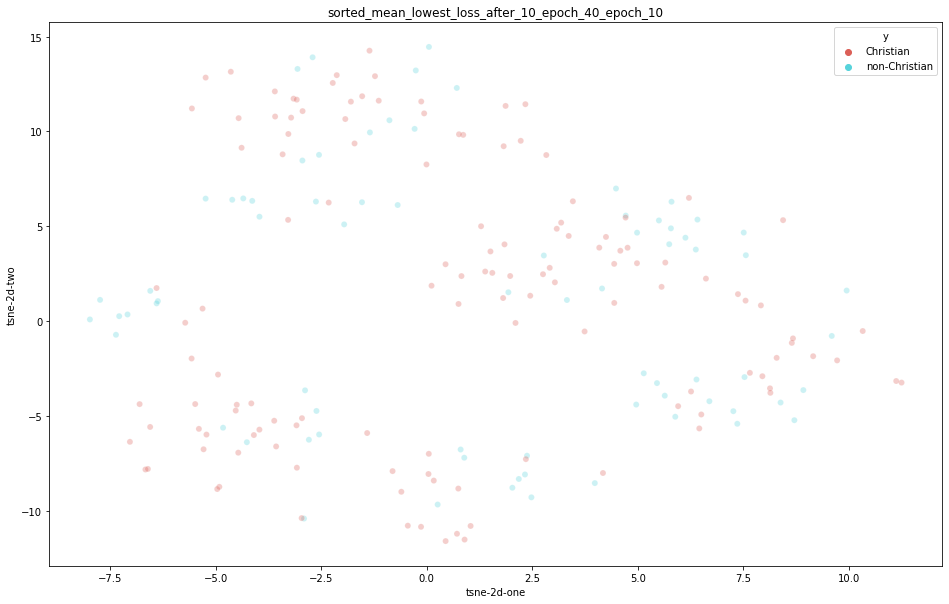

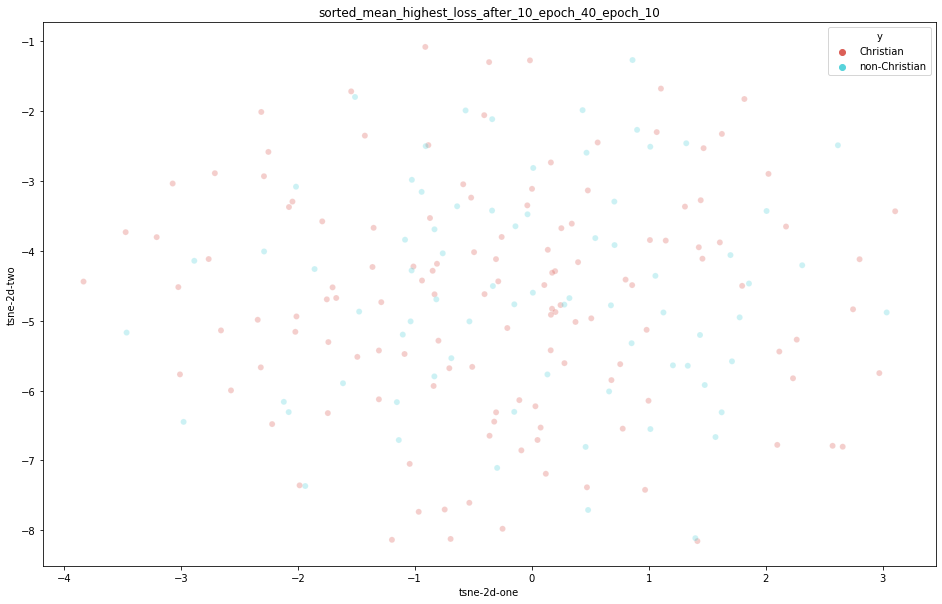

In [62]:
# vectors visualization
def get_embeddings_from_path(exp1_path=f"Embeddings/mondial/EK_3_100_500_10_50000_0experiment_try_sorted_correct_lowest_loss_after_10_epoch_44"):
    embedding_remove_1 = io_utils.load_embedding(exp1_path)
    return list(embedding_remove_1.values())

def plot_tsne_of_embeddings(exp1_path=f"Embeddings/mondial/EK_3_100_500_10_50000_0experiment_try_sorted_correct_lowest_loss_after_10_epoch_44",target_path='Datasets\\mondial\\target.csv',target="Target"):
    x = get_embeddings_from_path(exp1_path)
    tsne = TSNE(n_components=2, verbose=1, random_state=123)
    tsne_results = tsne.fit_transform(x) 
    df_subset = pd.DataFrame()
    df_subset['tsne-2d-one'] = tsne_results[:,0]
    df_subset['tsne-2d-two'] = tsne_results[:,1]
    plt.figure(figsize=(16,10))
    df_subset['y'] = pd.read_csv(target_path)[target]
    sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
        hue="y",
        palette=sns.color_palette("hls", 2),
        data=df_subset,
        legend="full",
        alpha=0.3
    )
    plt.gca().set_title(f"{exp1_path.split('experiment_')[-1]}")
# plot_tsne_of_embeddings(exp1_path=f"Embeddings/mondial/EK_3_100_500_10_50000_0experiment_try_sorted_correct_lowest_loss_after_10_epoch_44")


data_n="mondial"
# for exp_n in ["conditional_entropy_from_low_to_high_removed_43","conditional_entropy_removed_43","orig_forward"]:
for exp_n in ["sorted_mean_lowest_loss_after_10_epoch_40","sorted_mean_highest_loss_after_10_epoch_40"]:
    exp_n = exp_n + "_"
    embeddings_paths = sorted(get_all_exp_with_exp_name(f"{exp_n}epoch_", data_name=f"Embeddings/{data_n}"),key=lambda p:int(p.split(f"{exp_n}epoch_")[-1]))
    print(f"Original forward's cosine mean dist between 2 vectors progression on {data_n}:\n{exp_n}")
    # for p in embeddings_paths:
    p=embeddings_paths[-1]
    plot_tsne_of_embeddings(exp1_path=p,target_path='Datasets\\mondial\\target.csv',target="Target")

Original forward's cosine mean dist between 2 vectors progression on mondial:
sorted_mean_lowest_loss_after_10_epoch_40_
Original forward's cosine mean dist between 2 vectors progression on mondial:
sorted_mean_highest_loss_after_10_epoch_40_


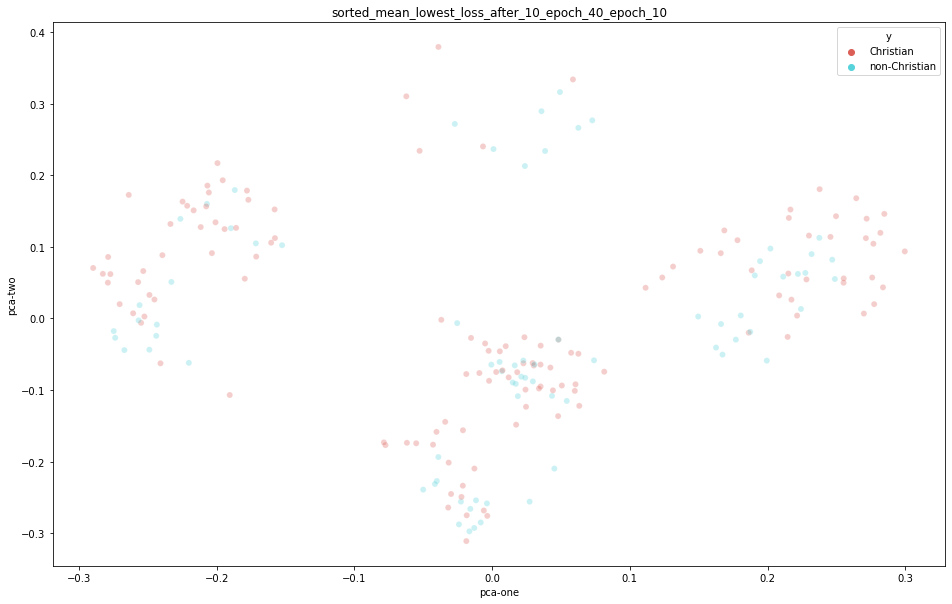

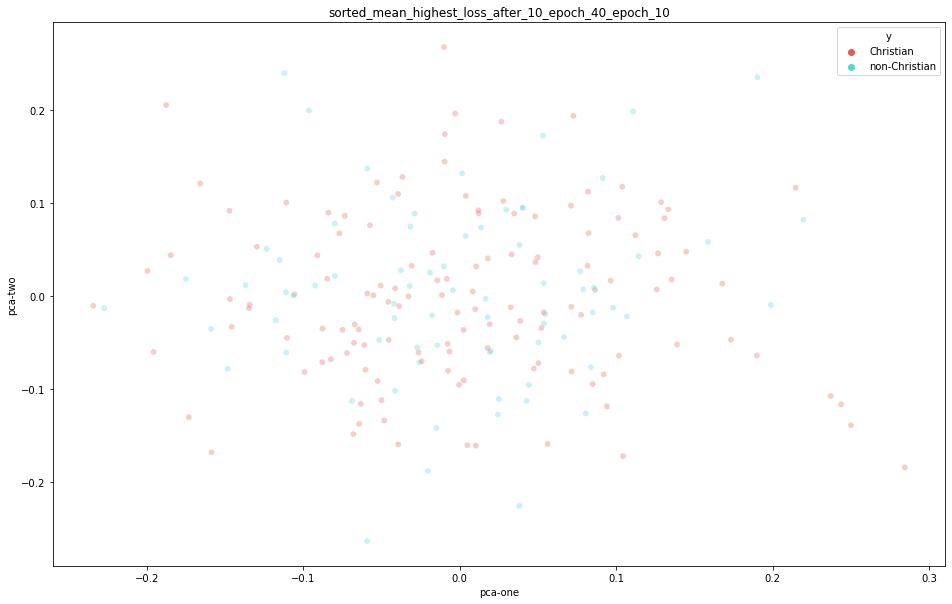

In [65]:
# vectors visualization
def plot_pca_of_embeddings(exp1_path=f"Embeddings/mondial/EK_3_100_500_10_50000_0experiment_try_sorted_correct_lowest_loss_after_10_epoch_44",target_path='Datasets\\mondial\\target.csv',target="Target"):
    x = get_embeddings_from_path(exp1_path)
    pca = PCA(n_components=3)
    pca_result = pca.fit_transform(x) 
    df_subset_pca = pd.DataFrame()
    df_subset_pca['pca-one'] = pca_result[:,0]
    df_subset_pca['pca-two'] = pca_result[:,1] 
    df_subset_pca['pca-three'] = pca_result[:,2]
    df_subset_pca['y'] = pd.read_csv(target_path)[target]
    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="pca-one", y="pca-two",
        hue="y",
        palette=sns.color_palette("hls", 2),
        data=df_subset_pca,#.loc[rndperm,:],
        legend="full",
        alpha=0.3
    )
    plt.gca().set_title(f"{exp1_path.split('experiment_')[-1]}")

data_n="mondial"
#for exp_n in ["conditional_entropy_from_low_to_high_removed_43","conditional_entropy_removed_43","orig_forward"]:
for exp_n in ["sorted_mean_lowest_loss_after_10_epoch_40","sorted_mean_highest_loss_after_10_epoch_40"]:
    exp_n = exp_n + "_"
    embeddings_paths = sorted(get_all_exp_with_exp_name(f"{exp_n}epoch_", data_name=f"Embeddings/{data_n}"),key=lambda p:int(p.split(f"{exp_n}epoch_")[-1]))
    print(f"Original forward's cosine mean dist between 2 vectors progression on {data_n}:\n{exp_n}")
    # for p in embeddings_paths:
    p=embeddings_paths[-1]
    plot_pca_of_embeddings(exp1_path=p,target_path='Datasets\\mondial\\target.csv',target="Target")